In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import string
from itertools import product
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [23]:
from get_lookup_indicies import get_lookup_indicies
from get_kmers import get_kmers
from int_to_based_string import int_to_based_string
from based_string_to_int import based_string_to_int
from process_input import process_input

# 2- non-Binary state 1-D Cellular Automata

This notebook will cover:
- Extending CA states from the binary case to an arbitrary number

Where as in the previous workbook we saw the implementation of a binary set of states [0,1] for 1-D Cellular Automata, this workbook will extend that to an arbitrary set of states.

For this to be more intuitive, states will be replaced with an alphabet, namely the first n letters of the alphabet (uppercase)

The functions created in C1 will remain mostly the same, with the following changes [~~removed~~, **new**]:
1. get_lookup_indicies: no changes
1. ~~get_binary_rule_rep~~: not used, replaced with int_to_based_string
1. get_kmers: no changes
1. ~~process_binary_input~~: not used, replaced with process_input
1. **int_to_based_string**: converts a rule number into its state representation extended to an arbitrary number of states
1. **based_string_to_int**: conversts a sequence of states into the corresponding rule number (inverse of int_to_based_string)
1. **process_input**: process an input sequence through a given rule using the functions above, but extended to an arbitrary number of states

## a) Function Modifications

The following will implement the above mentioned functions

### b.1) get_lookup_indicies(inpt_alphabet, order=3)

notes:
- validation that function works for arbitrary number of states

In [24]:
state_counts = [2, 3, 4]
rule_orders = [2, 3]

for test_state_count, test_order in product(state_counts, rule_orders):
    test_states = string.ascii_uppercase[:test_state_count]
    
    kmer_indicies_mapping = get_lookup_indicies(states=test_states, order=test_order)
    print(f'\nFor states {inpt_states} & a rule order = {test_order} , the fixed CA rule lookup indicies are:')
    pprint(kmer_indicies_mapping)


For states ABCD & a rule order = 2 , the fixed CA rule lookup indicies are:
{'AA': 0, 'AB': 1, 'BA': 2, 'BB': 3}

For states ABCD & a rule order = 3 , the fixed CA rule lookup indicies are:
{'AAA': 0, 'AAB': 1, 'ABA': 2, 'ABB': 3, 'BAA': 4, 'BAB': 5, 'BBA': 6, 'BBB': 7}

For states ABCD & a rule order = 2 , the fixed CA rule lookup indicies are:
{'AA': 0,
 'AB': 1,
 'AC': 2,
 'BA': 3,
 'BB': 4,
 'BC': 5,
 'CA': 6,
 'CB': 7,
 'CC': 8}

For states ABCD & a rule order = 3 , the fixed CA rule lookup indicies are:
{'AAA': 0,
 'AAB': 1,
 'AAC': 2,
 'ABA': 3,
 'ABB': 4,
 'ABC': 5,
 'ACA': 6,
 'ACB': 7,
 'ACC': 8,
 'BAA': 9,
 'BAB': 10,
 'BAC': 11,
 'BBA': 12,
 'BBB': 13,
 'BBC': 14,
 'BCA': 15,
 'BCB': 16,
 'BCC': 17,
 'CAA': 18,
 'CAB': 19,
 'CAC': 20,
 'CBA': 21,
 'CBB': 22,
 'CBC': 23,
 'CCA': 24,
 'CCB': 25,
 'CCC': 26}

For states ABCD & a rule order = 2 , the fixed CA rule lookup indicies are:
{'AA': 0,
 'AB': 1,
 'AC': 2,
 'AD': 3,
 'BA': 4,
 'BB': 5,
 'BC': 6,
 'BD': 7,
 'CA': 8,
 'C

## b.2) get_kmers(inpt_seq, k=3, looping=False)

Notes:
- For even number orders and the looping case, the extra kmer overlap is deffered to the end of the kmers list
- validation that function works for arbitrary number of states

In [25]:
alphabet_size = 3
inpt_alphabet = string.ascii_uppercase[:alphabet_size]
sequence_lengths = [3, 7, 11]
input_sequences = [''.join(np.random.choice(list(inpt_alphabet), size=s_length)) for s_length in sequence_lengths]
k_vals = [2, 3, 4]
looping_vals = [True, False]

for inpt, k, looping in product(input_sequences, k_vals, looping_vals):
    kmers = get_kmers(inpt_seq=inpt, k=k, looping=looping)
    if kmers:
        if looping:
            assert(len(kmers) == len(inpt))
        else:
            assert(len(kmers) == len(inpt) - k + 1)
    print(f'{"looping" if looping else "non-looping"} {k}-mers for input: {inpt}:\n{kmers}\n')

looping 2-mers for input: BBC:
['BB', 'BC', 'CB']

non-looping 2-mers for input: BBC:
['BB', 'BC']

looping 3-mers for input: BBC:
['CBB', 'BBC', 'BCB']

non-looping 3-mers for input: BBC:
['BBC']

looping 4-mers for input: BBC:
None

non-looping 4-mers for input: BBC:
None

looping 2-mers for input: ABABBAA:
['AB', 'BA', 'AB', 'BB', 'BA', 'AA', 'AA']

non-looping 2-mers for input: ABABBAA:
['AB', 'BA', 'AB', 'BB', 'BA', 'AA']

looping 3-mers for input: ABABBAA:
['AAB', 'ABA', 'BAB', 'ABB', 'BBA', 'BAA', 'AAA']

non-looping 3-mers for input: ABABBAA:
['ABA', 'BAB', 'ABB', 'BBA', 'BAA']

looping 4-mers for input: ABABBAA:
['AABA', 'ABAB', 'BABB', 'ABBA', 'BBAA', 'BAAA', 'AAAB']

non-looping 4-mers for input: ABABBAA:
['ABAB', 'BABB', 'ABBA', 'BBAA']

looping 2-mers for input: CBCBCCCBACC:
['CB', 'BC', 'CB', 'BC', 'CC', 'CC', 'CB', 'BA', 'AC', 'CC', 'CC']

non-looping 2-mers for input: CBCBCCCBACC:
['CB', 'BC', 'CB', 'BC', 'CC', 'CC', 'CB', 'BA', 'AC', 'CC']

looping 3-mers for input: CB

### b.3) int_to_based_string(number, states, length) & based_string_to_int(sequence, states)

notes:
- these functions are inverses of one another

In [26]:
test_states_count = [2, 3, 4]
test_lengths = [3, 5, 7, 11]

for states_count, sequence_length in product(test_states_count, test_lengths):
    states = string.ascii_uppercase[:states_count]
    sequences_count = states_count ** sequence_length
    
    # choose a random sequence number
    test_number = np.random.randint(sequences_count)
    
    # convert number into appropriate length sequence of states 
    based_string = int_to_based_string(number=test_number,
                                       states=states,
                                       length=sequence_length)

    # convert the based_string back into an int
    converted_int = based_string_to_int(sequence=based_string, states=states)
    
    assert converted_int == test_number
    assert len(based_string) == sequence_length
    
    print(f'Based string representation of number {test_number} in states {states} is:\
    \n\t{based_string} with length = {sequence_length}\n')



Based string representation of number 7 in states AB is:    
	BBB with length = 3

Based string representation of number 2 in states AB is:    
	AAABA with length = 5

Based string representation of number 68 in states AB is:    
	BAAABAA with length = 7

Based string representation of number 1828 in states AB is:    
	BBBAABAABAA with length = 11

Based string representation of number 16 in states ABC is:    
	BCB with length = 3

Based string representation of number 166 in states ABC is:    
	CAABB with length = 5

Based string representation of number 1656 in states ABC is:    
	CACBBAA with length = 7

Based string representation of number 94256 in states ABC is:    
	BBCBAACBCCC with length = 11

Based string representation of number 44 in states ABCD is:    
	CDA with length = 3

Based string representation of number 638 in states ABCD is:    
	CBDDC with length = 5

Based string representation of number 7302 in states ABCD is:    
	BDACABC with length = 7

Based string represen

### b.4) process_inpt(inpt_seq, rule_number, input_states='01', order=3, looping=True)

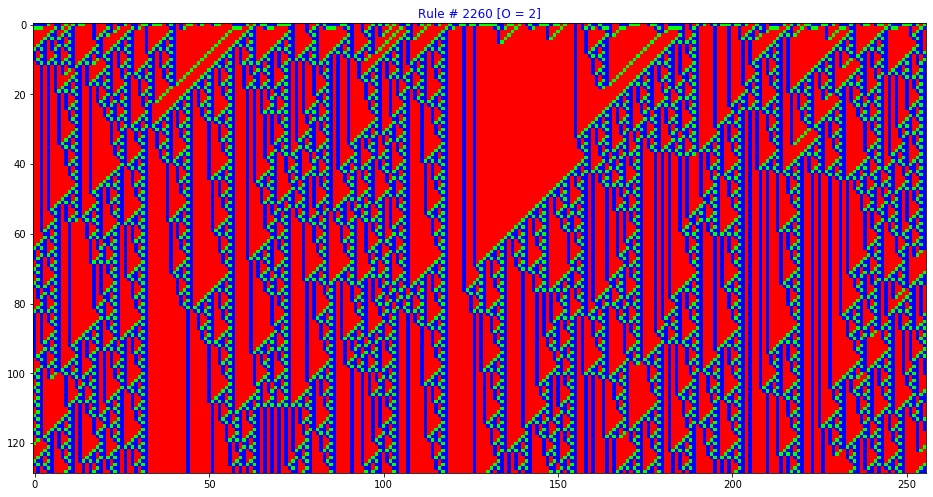

In [94]:
# set input params & choose a random init input
states_count = 3 # fixed, if changed must change color_map values accordingly
states = string.ascii_uppercase[:states_count]

# set CA rule params & choose a random processing rule
rule_order = 2
rule_space_maginitude = states_count ** states_count ** rule_order
random_rule_number = np.random.randint(0, rule_space_maginitude)

# create a random input of length > O
width_pixels = 256
init_input = ''.join(np.random.choice(list(states), size=256))

# memory of itteration runs
process_history = [init_input]

itteration_counts = int(width_pixels/2)
for itt in range(itteration_counts):
    inpt_seq = process_history[-1]
    next_inpt_seq = process_input(inpt_seq=inpt_seq,
                                  rule_number=random_rule_number,
                                  states=states,
                                  order=rule_order)
    process_history.append(next_inpt_seq)

# plot output

# R/G/B color map for states [A, B, C]
color_map = {'A':[255, 0, 0],
             'B':[0, 255, 0],
             'C':[0, 0, 255]}

# convert states to Black/White RGBA
process_history = [[color_map[val] for val in seq] for seq in process_history]

fig = plt.figure(figsize=(16,16))
ax = plt.imshow(process_history)
plot_title = f'Rule # {random_rule_number} [O = {rule_order}]' 

title_obj = plt.title(plot_title)
plt.setp(title_obj, color='b')

plt.show()

### TODO:
- implement plots for states [A, B, C] where the initial sequence is the combinations of a single of any of the states in a 'sea' of any of the other states. (eg. AAAAAAAAAABAAAAAAAAAA)
- extend plotting for more than 3 states (although this serves little as the rule space magnitude increases phenomonally and most rules tend to not have very interesting results)
- the rule order for the plotting cannot be changed to more than 2 due to limitations of np.rand.randint requiring only an int32 maximum. A workaround can be to generate a random rule sequence of the appropriate length, then converting it to the appropriate rule number using based_string_to_int.